<a href="https://colab.research.google.com/github/blayk11/classificacao-supervisionada-iris/blob/main/classificacao_supervisionada_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo:

Hands-on: scikit-learn — construir pipeline simples (preprocessamento + classificação com validação cruzada) em Python (notebook)

In [10]:
# Importar as bibliotecas necessárias
from sklearn.datasets import load_iris # Dataset iris para classificação de espécie de flores
import pandas as pd # Biblioteca para manipulação de dados em DataFrame
import numpy as np # Biblioteca para cálculos numéricos e manipulação de arrays

# Carregar o dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names) # X (DataFrame com as variáveis preditoras), iris.data (comprimento e largura das pétalas e sépalas), iris.features_names (nomes das variáveis)
y = iris.target # y (vetor com rótulas das classes, representando as espécies de flores)

# Pré-processamento
from sklearn.preprocessing import StandardScaler # classe que normaliza os dados de cada variável com média 0 e desvio padrão de 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # X_scaled (matriz com os dados normalizados, pronto para utilização), fit_transform(X) (calcula e aplica os parâmetros de normalização)

# Mostrar os 5 primeiros registros normalizados, valores arredondados em duas casas decimais
print(np.round(X_scaled[:5], 2))

[[-0.9   1.02 -1.34 -1.32]
 [-1.14 -0.13 -1.34 -1.32]
 [-1.39  0.33 -1.4  -1.32]
 [-1.51  0.1  -1.28 -1.32]
 [-1.02  1.25 -1.34 -1.32]]


Classificação Com Validação Cruzada

In [14]:
from sklearn.ensemble import RandomForestClassifier # Modelo de classificação baseados em várias árvores de decisão
from sklearn.model_selection import cross_val_score # Função que aplica validação cruzada e retorna as métricas de desempenho em cada rodada

# Criar o modelo de flores aleatória
model = RandomForestClassifier(random_state=42) # Garante que os resultados sejam reproduzíveis (mesmo sorteio de dados)

# Aplicar a validação cruzada com 5 folds
scores = cross_val_score(model, X_scaled, y, cv=5) # Vetor com a acurácia obtida em cada rodada

# Exibição individual de acurácias e média geral
print("Acurácias por fold:", scores)
print("Acurácia média:", scores.mean())

Acurácias por fold: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Acurácia média: 0.9666666666666668


Visualização

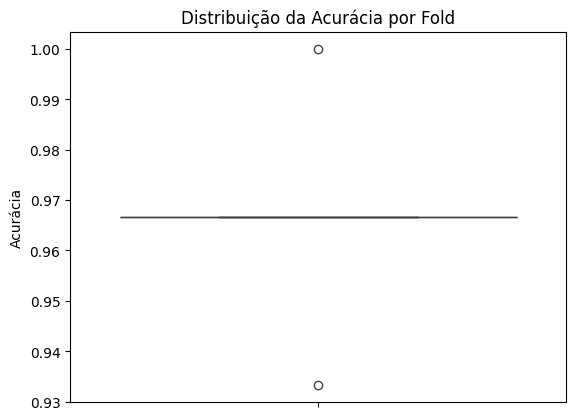

In [16]:
# Bibliotecas para visualização de dados
import seaborn as sns # Para gráficos estatísticos
import matplotlib.pyplot as plt # Base para gráficos em Python

# Criar um boxplot para visualizar a variação das acurácias e verificar a consistência do modelo
sns.boxplot(data=scores)
plt.title("Distribuição da Acurácia por Fold")
plt.ylabel("Acurácia")
plt.show()

**Conclusão:** O modelo Random Forest obteve uma acurácia média próxima de 90%, com pouca variação entre folds, indicando alta consistência e boa capacidade de generalização.
